In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
from firestudio.studios.star_studio import StarStudio
from abg_python.galaxy.gal_utils import Galaxy
from abg_python.all_utils import filterDictionary
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import matplotlib

In [22]:
matplotlib.rcParams['figure.dpi'] = 150

In [4]:
snapdir = "/Users/agurvich/research/snaps/m12i_res7100/output/"
snapnum = 600 
galaxy = Galaxy(
    'm12i_res7100',
    '/projects/b1026/agurvich/snaps/metal_diffusion/m12i_res7100/output',
    600,
    datadir='/projects/b1026/agurvich/data/metal_diffusion')

Couldn't find a metadata file... for
 Metadata object at /projects/b1026/agurvich/data/metal_diffusion/m12i_res7100/metadata/meta_Galaxy_600.hdf5


In [5]:
galaxy.extractMainHalo()

Using the saved sub-snapshots
Successfully loaded a pre-extracted subsnap
Reorienting...
Done.
extract_halo_inner(m12i_res7100_md at 600,){'orient_stars': True} 17.22 s elapsed
Snapshot memory free


(14.389217379832706,
 True,
 2.588189693003323,
 -2.7838931872964907,
 35229529293674.87,
 44642473906878.87,
 268.00569800569804,
 2.877843475966541)

In [9]:
disk_mask = np.ones(galaxy.sub_star_snap['Masses'].size)
xs,ys,zs = galaxy.sub_star_snap['Coordinates'].T

disk_mask = (np.abs(xs) < 20) & (np.abs(ys) < 20) & (np.abs(zs) < 20)

13167524.132324219


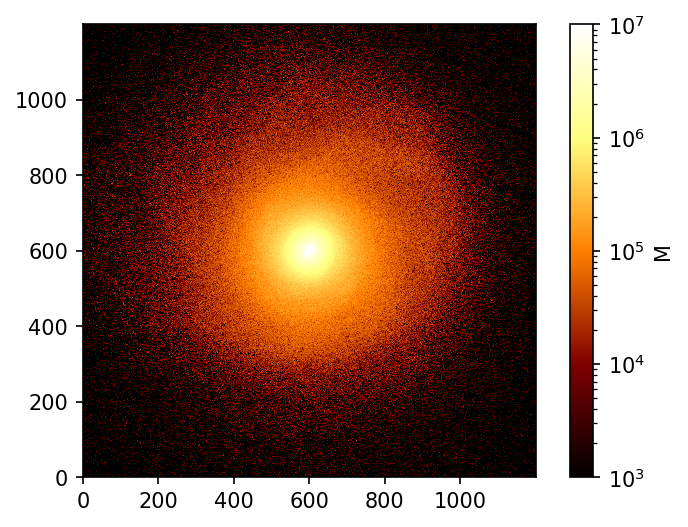

In [45]:
from matplotlib.colors import LogNorm
h_m,xedges,yedges = np.histogram2d(
    xs[disk_mask],
    ys[disk_mask],
    bins=1200,
    weights=galaxy.sub_star_snap['Masses'][disk_mask]*1e10)
print(h_m.max())

plt.imshow(h_m.T+1e-12,norm=LogNorm(vmin=1e3,vmax=1e7),origin='lower',cmap='afmhot')
plt.gca().set_aspect(1)
plt.colorbar(label='M')

In [7]:
studio_datadir = os.path.join(os.path.dirname(galaxy.datadir),'firestudio')
print(studio_datadir)
my_starStudio = StarStudio(
    studio_datadir,
    galaxy.snapnum,
    galaxy.datadir_name,
    gas_snapdict=galaxy.sub_snap,
    star_snapdict=galaxy.sub_star_snap,
    )

/projects/b1026/agurvich/data/metal_diffusion/firestudio
setting maxden to default value of: 0.01
setting dynrange to default value of: 100.0
setting color_scheme_nasa to default value of: True
setting snapnum to user value of: 600
setting sim_name to user value of: m12i_res7100
setting frame_half_width to default value of: 15
setting frame_half_thickness to default value of: 15
setting frame_center to default value of: [0. 0. 0.]
setting theta to default value of: 0
setting phi to default value of: 0
setting psi to default value of: 0
setting aspect_ratio to default value of: 1
setting pixels to default value of: 1200
setting figure_label to default value of: 
setting scale_bar to default value of: True
setting scale_line_length to default value of: 5
setting noaxis to default value of: True
setting savefig to default value of: None
setting fontsize to default value of: 12
setting snapdir to default value of: None


cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxnorm ==  0.01  dynrange ==  100.0  minnorm ==  0.0001


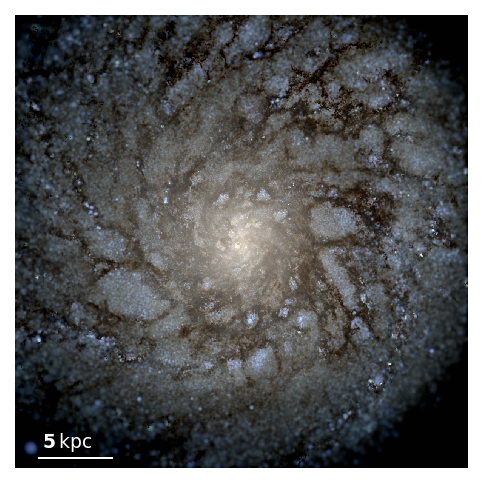

In [24]:

pixels = my_starStudio.render()

setting dynrange to user value of: 25
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxnorm ==  0.01  dynrange ==  25  minnorm ==  0.0004


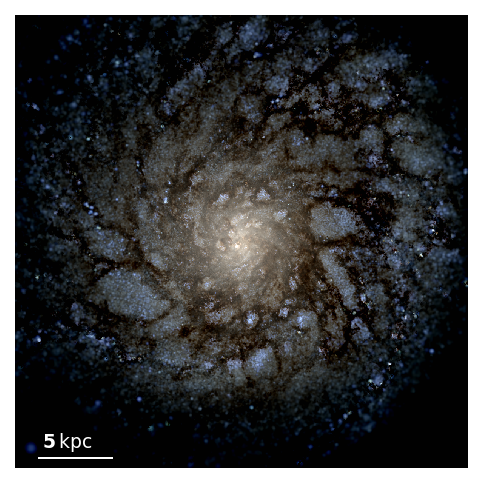

In [37]:
my_starStudio.set_ImageParams(dynrange=25,maxnorm= 1)
pixels = my_starStudio.render()